In [1]:
%pip install yfinance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.1 MB/s  0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15637 sha256=d893fc40550e627a287d659082beb30be72140e080dc8c849104c463764ccc11
  Stored in directory: /Users/administrator/Library/Caches/pip/wheels/1e/df/0f/e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [yfinance]3/5 [curl_cffi]]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
%pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.4 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]y]
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


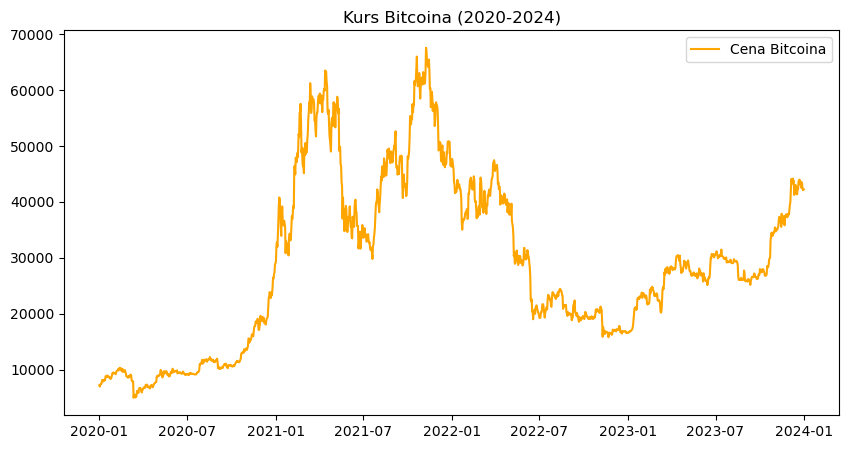

In [5]:
# dane Bitcoina
df = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')
df = df.reset_index()

# wykres
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Cena Bitcoina', color='orange')
plt.title("Kurs Bitcoina (2020-2024)")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
00:46:52 - cmdstanpy - INFO - Chain [1] start processing
00:46:54 - cmdstanpy - INFO - Chain [1] done processing


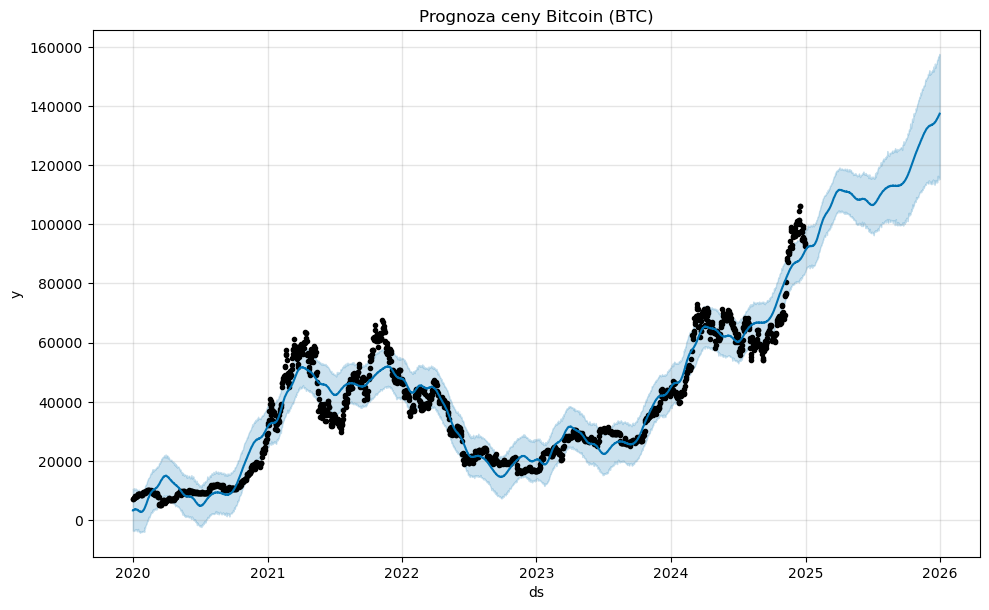

In [7]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# pobranie danych btc z yahoo (zakres 5 lat)
data = yf.download('BTC-USD', start='2020-01-01', end='2025-01-01')

# wyciągnięcie daty z indeksu do kolumny
data = data.reset_index()

# naprawa formatu kolumn (usunięcie multiindeksu)
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

# przygotowanie tabeli pod wymogi prophet (zmiana nazw na ds i y)
df_train = pd.DataFrame()
df_train['ds'] = data['Date']
df_train['y'] = data['Close']

# inicjalizacja i dopasowanie modelu do danych
model = Prophet()
model.fit(df_train)

# stworzenie ramy czasowej na przyszłość (365 dni)
future = model.make_future_dataframe(periods=365)

# wyliczenie prognozy
forecast = model.predict(future)

# generowanie wykresu
model.plot(forecast)
plt.title("Prognoza ceny Bitcoin (BTC)")
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error

# wyciągnięcie prognozy dla okresu, który już znamy (historia)
forecast_history = forecast.iloc[:len(df_train)]

# obliczenie błędu mae (średnia pomyłka modelu w dolarach)
mae = mean_absolute_error(df_train['y'], forecast_history['yhat'])

# wyświetlenie wyniku
print(f"Średni błąd modelu (MAE): {mae:.2f} USD")

Średni błąd modelu (MAE): 4173.36 USD


#wnioski

1. **Cel:** Analiza historycznych cen Bitcoin (BTC-USD) i prognoza na najbliższy rok.
2. **Model:** Wykorzystano model Facebook Prophet, który dobrze radzi sobie z sezonowością i trendami finansowymi.
3. **Obserwacje:**
   - Wykres pokazuje wyraźny trend wzrostowy w długim okresie, mimo okresowych spadków (korekty).
   - Model przewiduje kontynuację trendu w nadchodzącym roku (niebieska linia na wykresie).
   - Obszar zacieniony na wykresie pokazuje "przedział ufności" – im dalej w przyszłość, tym większa niepewność.
4. **Ocena modelu:** Średni błąd (MAE) wskazuje, że prognoza może odchylać się od rzeczywistości, co jest naturalne dla tak zmiennego rynku jak kryptowaluty.